In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
print("Shape:", df.shape)
print(df["Class"].value_counts())

Shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\jmd\AppData\Local\Temp\ipykernel_9856\962033156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="Set2")
C:\Users\jmd\AppData\Local\Temp\ipykernel_9856\962033156.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


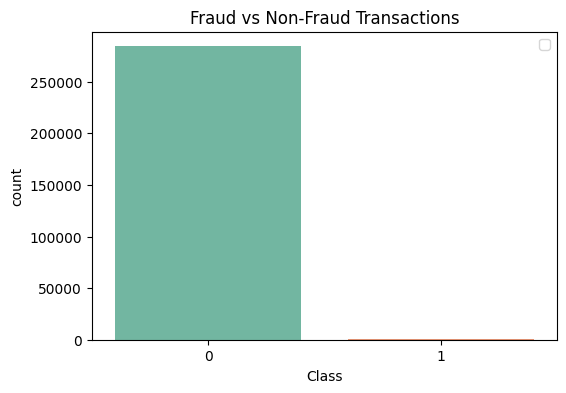

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.legend()
plt.show()

In [11]:
scaler = StandardScaler()
df["Amount_Scaled"] = scaler.fit_transform(df[["Amount"]])
df["Time_Scaled"] = scaler.fit_transform(df[["Time"]])

#drop original amount and time

In [12]:
df = df.drop(["Amount", "Time"], axis=1)

In [13]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#train test split

In [14]:
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#Logistic Regression model

In [15]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

#prediction

In [16]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55475  1389]
 [    8    90]]
ROC-AUC Score: 0.9721669425367221
